In [18]:
import os
import numpy as np
import pandas as pd
import sklearn.neighbors
import sklearn.tree
from sklearn.metrics import *
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt

os.chdir("C:\\Users\\Keshav Gambhir\\Desktop\\fashion-mnist\\utils")
print(os.getcwd())
import mnist_reader

C:\Users\Keshav Gambhir\Desktop\fashion-mnist\utils


In [19]:
class NaiveBayes:
  def __init__(self,x_train,y_train):
    self.x_train = x_train
    self.y_train = y_train

  def seperate_entites(self):
    self.index_of_1 = []
    self.index_of_2 = []
    i = 0
    while(i<len(self.y_train)):
      if(self.y_train[i] == 1):
        self.index_of_1.append(i)
      if(self.y_train[i] == 2):
        self.index_of_2.append(i)
      i+=1

  def mean_variance(self):
    self.mean_of_1 = np.mean((self.x_train[self.index_of_1]),axis = 0)
    self.mean_of_2 = np.mean((self.x_train[self.index_of_2]),axis = 0)
    self.variance_of_1 = np.var((self.x_train[self.index_of_1]),axis = 0) + (1e-6)
    self.variance_of_2 = np.var((self.x_train[self.index_of_2]),axis = 0) + (1e-6)
  
  def gaussian_function_one(self,input):
    exp_term = ((input-self.mean_of_1)**2/(2*self.variance_of_1))
    prob = (1/(2*math.pi*self.variance_of_1)**0.5) * np.exp(-exp_term)
    return np.sum(np.log(prob+1e-6))
  
  def gaussian_function_two(self,input):
    exp_term = ((input-self.mean_of_2)**2/(2*self.variance_of_2))
    prob = (1/(2*math.pi*self.variance_of_2)**0.5) * np.exp(-exp_term)
    return np.sum(np.log(prob+1e-6))
  
  def predict(self,x_test):
    output = []
    for val in x_test:
      prob_trouser = self.gaussian_function_one(val)
      prob_pullover = self.gaussian_function_two(val)

      if(prob_trouser > prob_pullover):
        output.append(1)
      else:
        output.append(2)
    return output


In [23]:
def evaluate(y_test_actual,y_test_predicted):
  print("CONFUSION MATRIX:")
  print()
  print(metrics.confusion_matrix(y_test_actual,y_test_predicted))
  print()
  print()
  print()
  fpr, tpr, threshold = metrics.roc_curve(y_test_actual, y_test_predicted,pos_label=2)
  roc_auc = metrics.auc(fpr, tpr)
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()
  print()
  print()
  accuracy = metrics.accuracy_score(y_test_actual,y_test_predicted)
  precision = metrics.precision_score(y_test_actual,y_test_predicted)
  recall = metrics.recall_score(y_test_actual,y_test_predicted)
  print("Accuracy: "+str(accuracy))
  print("Precision: "+str(precision))
  print("Recall: "+str(recall))

CONFUSION MATRIX:

[[966  34]
 [ 48 952]]





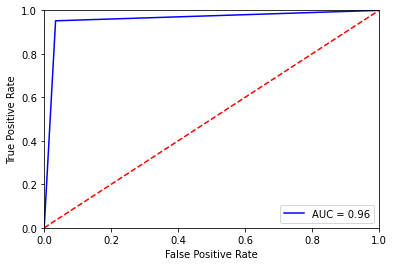



Accuracy: 0.959
Precision: 0.9526627218934911
Recall: 0.966


In [24]:
def readDataset():
  x_train, y_train = mnist_reader.load_mnist('../data/fashion', kind='train')
  x_test, y_test = mnist_reader.load_mnist('../data/fashion', kind='t10k')
  return x_train,y_train ,x_test,y_test

def transformData():
  x_train,y_train,x_test,y_test = readDataset()
  train_data_index = []
  test_data_index = []
  
  i = 0
  while(i < len(y_train)):
    if(y_train[i] == 1) or (y_train[i] == 2):
      train_data_index.append(i)
    i += 1
  
  j = 0
  while(j < len(y_test)):
    if (y_test[j] == 1) or (y_test[j] == 2):
      test_data_index.append(j)
    j += 1
  
  x_train,y_train = x_train[train_data_index],y_train[train_data_index]
  x_test,y_test = x_test[test_data_index],y_test[test_data_index]
  
  x_train = np.array(list(map(lambda x: x/255,x_train)))
  x_test = np.array(list(map(lambda x: x/255,x_test)))
  x_train = np.squeeze(x_train)
  x_train_tmp,x_test_tmp,y_train_tmp,y_test_tmp = train_test_split(x_train,y_train,test_size = 0.20, random_state = 0)
  

  return x_train_tmp,y_train_tmp,x_test_tmp,y_test_tmp,x_test,y_test

def main():
  x_train_tmp,y_train_tmp,x_test_tmp,y_test_tmp,x_test,y_test = transformData()
  NB = NaiveBayes(x_train_tmp,y_train_tmp)
  NB.seperate_entites()
  NB.mean_variance()
  output = NB.predict(x_test)
  evaluate(y_test,output)

main()